In [1]:
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette="Set2")

# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Train-test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae

# setting logging to print only error messages from Sklearnex
import logging
logging.basicConfig()
logging.getLogger("SKLEARNEX").setLevel(logging.ERROR)

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Sept11Travel.csv to Sept11Travel (2).csv


In [3]:
df = pd.read_csv("Sept11Travel.csv")

### Dataset Description

This dataset contains **monthly U.S. transportation statistics** from **January 1990 to August 2004**, covering three key travel metrics:

- **Month:** Period of observation (formatted as `Mon-YY`).
- **Air RPM (000s):** Revenue Passenger Miles by air carriers, measured in thousands.
- **Rail PM:** Passenger Miles traveled by rail.
- **VMT (billions):** Vehicle Miles Traveled on highways, in billions.

The dataset includes **172 monthly records** and can be used for **trend analysis, time series forecasting, and comparison of transportation modes** (air, rail, and road).


# **EDA and Data Preprocessing**

In [4]:
df.head()

,Month,Air RPM (000s),Rail PM,VMT (billions)
0,Jan-90,35153577,454115779,163.28
1,Feb-90,32965187,435086002,153.25
2,Mar-90,39993913,568289732,178.42
3,Apr-90,37981886,568101697,178.68
4,May-90,38419672,539628385,188.88


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Month           172 non-null    object 
 1   Air RPM (000s)  172 non-null    int64  
 2   Rail PM         172 non-null    int64  
 3   VMT (billions)  172 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 5.5+ KB


In [6]:
df.tail()

,Month,Air RPM (000s),Rail PM,VMT (billions)
167,Dec-03,57795908,489403554,237.6
168,Jan-04,53447972,410338691,217.3
169,Feb-04,52608801,389778365,210.4
170,Mar-04,63600019,453014590,247.5
171,Apr-04,61887720,471116666,245.4


In [7]:
# Convert Month to a datetime format
df['Month'] = pd.date_range(start='1990/01/01', end='2004/04/01',freq='MS')

In [8]:
df.head()

,Month,Air RPM (000s),Rail PM,VMT (billions)
0,1990-01-01,35153577,454115779,163.28
1,1990-02-01,32965187,435086002,153.25
2,1990-03-01,39993913,568289732,178.42
3,1990-04-01,37981886,568101697,178.68
4,1990-05-01,38419672,539628385,188.88


In [9]:
df.tail()

,Month,Air RPM (000s),Rail PM,VMT (billions)
167,2003-12-01,57795908,489403554,237.6
168,2004-01-01,53447972,410338691,217.3
169,2004-02-01,52608801,389778365,210.4
170,2004-03-01,63600019,453014590,247.5
171,2004-04-01,61887720,471116666,245.4


In [10]:
# Set the Month to be the index
df.set_index('Month',inplace=True)

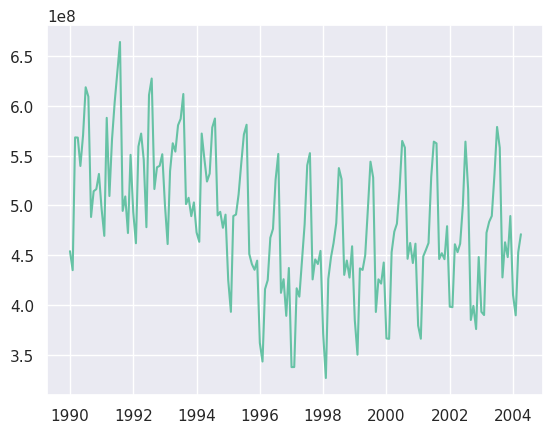

In [11]:
plt.plot(df['Rail PM'])

# Lag

In [12]:
df_rail = pd.DataFrame()
df_rail['y(t)'] = df['Rail PM']
df_rail['y(t-1)'] = [float('nan')]+list(df_rail['y(t)'][:-1])
df_rail['y(t-2)'] = [float('nan')]+list(df_rail['y(t-1)'][:-1])

In [13]:
df_rail.head()

,y(t),y(t-1),y(t-2)
Month,,,
1990-01-01,454115779,NaN,NaN
1990-02-01,435086002,454115779.0,NaN
1990-03-01,568289732,435086002.0,454115779.0
1990-04-01,568101697,568289732.0,435086002.0
1990-05-01,539628385,568101697.0,568289732.0


In [14]:
df_rail.corr()

,y(t),y(t-1),y(t-2)
y(t),1.000000,0.662715,0.411188
y(t-1),0.662715,1.000000,0.662701
y(t-2),0.411188,0.662701,1.000000


# ACF and PACF

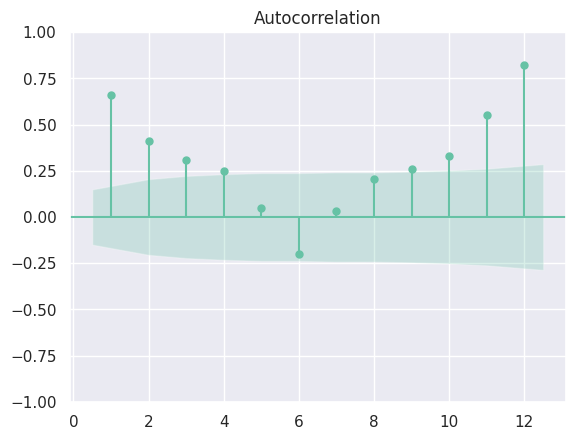

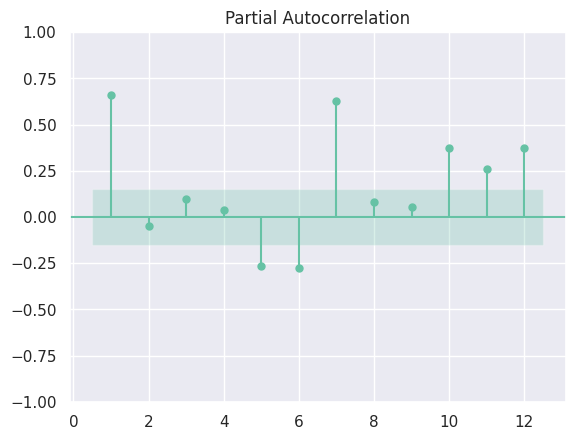

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_rail['y(t)'],lags=range(1,13))
plt.show()
plot_pacf(df_rail['y(t)'],lags=range(1,13))
plt.show()

# Stationarity Validation

In [16]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=7, shuffle=False)

In [17]:
trainset.head()

,Air RPM (000s),Rail PM,VMT (billions)
Month,,,
1990-01-01,35153577,454115779,163.28
1990-02-01,32965187,435086002,153.25
1990-03-01,39993913,568289732,178.42
1990-04-01,37981886,568101697,178.68
1990-05-01,38419672,539628385,188.88


In [18]:
trainset.shape

(137, 3)

**By Data Visualization**

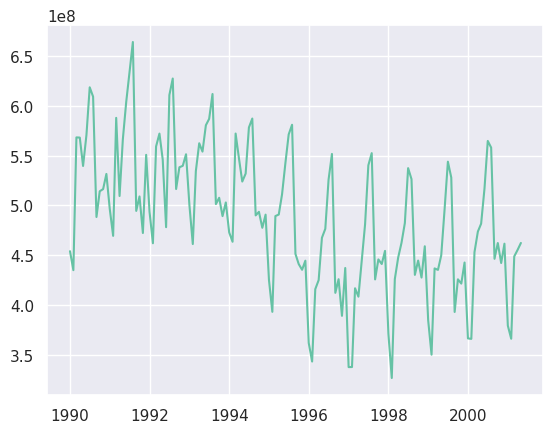

In [19]:
plt.plot(trainset["Rail PM"])

The means of the dataset change over time. Therefore, this is a non-stationary time series.

**Hypothesis Test**

In [20]:
from statsmodels.tsa.stattools import adfuller
# ADF test
result = adfuller(trainset["Rail PM"])

# get the p-value
p_value = result[1]

# Result
print(f"P-value: {p_value}")
if p_value>0.05:
    print("The data is non-stationary")
else:
    print("The data is stationary")

P-value: 0.7199335979974677
The data is non-stationary


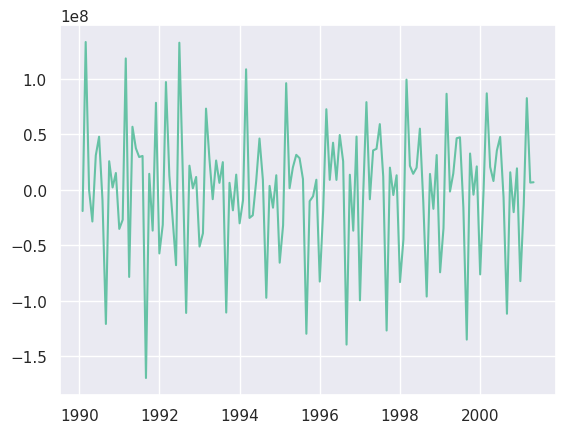

In [21]:
plt.plot(trainset["Rail PM"].diff())

In [22]:
# ADF test
result = adfuller(trainset["Rail PM"].diff().dropna())

# get the p-value
p_value = result[1]

# Result
print(f"P-value: {p_value}")
if p_value>0.05:
    print("The data is non-stationary")
else:
    print("The data is stationary")

P-value: 4.7529712703997945e-08
The data is stationary


After getting the first differencing, the data has become stationary.

# ACF and PACF

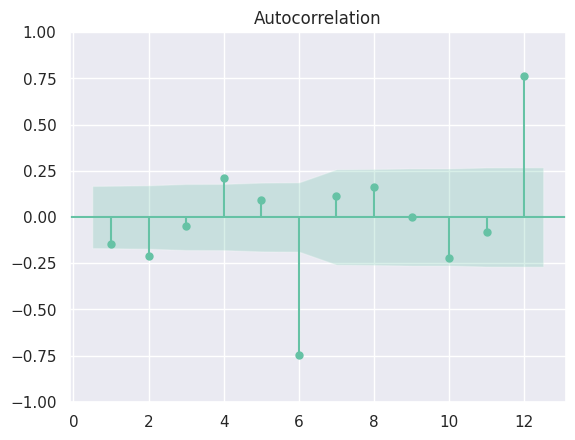

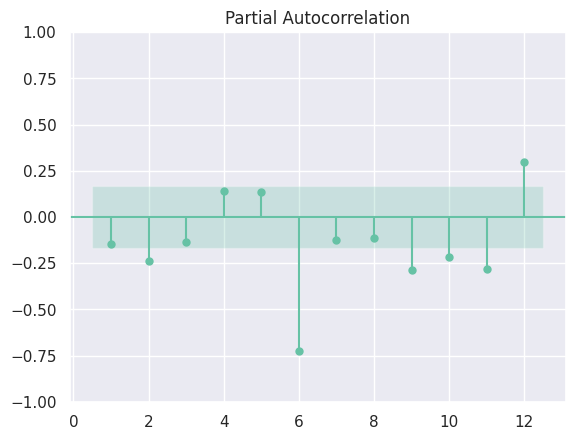

In [23]:
plot_acf(trainset['Rail PM'].diff().dropna(),lags=range(1,13))
plt.show()
plot_pacf(trainset['Rail PM'].diff().dropna(),lags=range(1,13))
plt.show()

# **Model development**

# ARIMA

**ARIMA(2,1,4)**

In [24]:
import statsmodels.api as sm
arima_model1 = sm.tsa.arima.ARIMA(trainset["Rail PM"], order=(2,1,4))
arima_res1 = arima_model1.fit()
print(arima_res1.summary())

                               SARIMAX Results                                
Dep. Variable:                Rail PM   No. Observations:                  137
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -2599.509
Date:                Wed, 05 Nov 2025   AIC                           5213.017
Time:                        14:12:47   BIC                           5233.406
Sample:                    01-01-1990   HQIC                          5221.303
                         - 05-01-2001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7305      0.016   -105.632      0.000      -1.763      -1.698
ar.L2         -0.9910      0.013    -78.428      0.000      -1.016      -0.966
ma.L1          1.8387      0.166     11.102      0.0

Text(0.5, 1.0, 'ARIMA(2,1,4)')

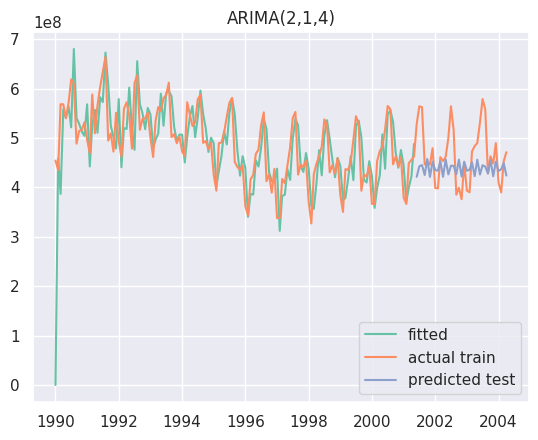

In [25]:
plt.plot(arima_res1.predict(), label='fitted')
plt.plot(df["Rail PM"],label='actual train')
plt.plot(arima_res1.predict(start=len(trainset),
                            end=(len(df)-1)), label='predicted test')
plt.legend()
plt.title("ARIMA(2,1,4)")

In [26]:
y_pred_arima_1 = arima_res1.predict(start=len(trainset), end=(len(df)-1))

In [27]:
print("MAE:", mae(testset["Rail PM"], y_pred_arima_1))
print("MAPE: {:.2f}%".format(mape(testset["Rail PM"], y_pred_arima_1) * 100))

MAE: 48775837.66154682
MAPE: 9.99%


**ARIMA(4,1,4)**

In [28]:
arima_model2 = sm.tsa.arima.ARIMA(trainset["Rail PM"], order=(4,1,4))
arima_res2 = arima_model2.fit()
print(arima_res2.summary())

                               SARIMAX Results                                
Dep. Variable:                Rail PM   No. Observations:                  137
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -2597.974
Date:                Wed, 05 Nov 2025   AIC                           5213.948
Time:                        14:12:51   BIC                           5240.162
Sample:                    01-01-1990   HQIC                          5224.601
                         - 05-01-2001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3466      0.294      1.177      0.239      -0.231       0.924
ar.L2         -0.4843      0.203     -2.391      0.017      -0.881      -0.087
ar.L3          0.3768      0.285      1.320      0.1

Text(0.5, 1.0, 'ARIMA(4,1,4)')

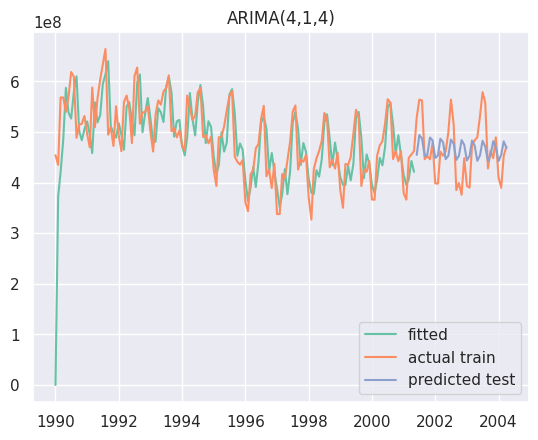

In [29]:
plt.plot(arima_res2.predict(), label='fitted')
plt.plot(df["Rail PM"],label='actual train')
plt.plot(arima_res2.predict(start=len(trainset),
                            end=(len(df)-1)), label='predicted test')
plt.legend()
plt.title("ARIMA(4,1,4)")

In [30]:
y_pred_arima_2 = arima_res2.predict(start=len(trainset), end=(len(df)-1))

In [31]:
print("MAE:", mae(testset["Rail PM"], y_pred_arima_2))
print("MAPE: {:.2f}%".format(mape(testset["Rail PM"], y_pred_arima_2) * 100))

MAE: 43114756.05241702
MAPE: 9.32%


There is no significant difference between performances of the two models.

# SARIMA

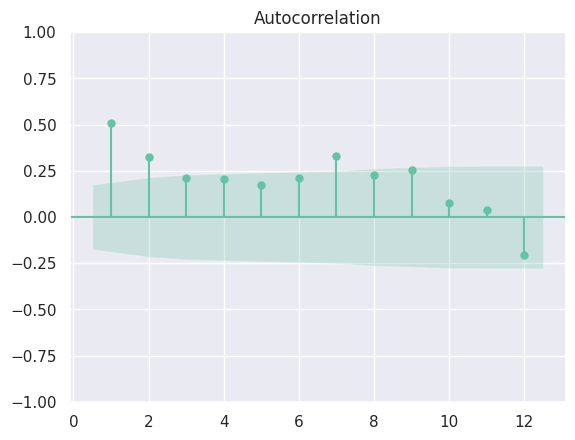

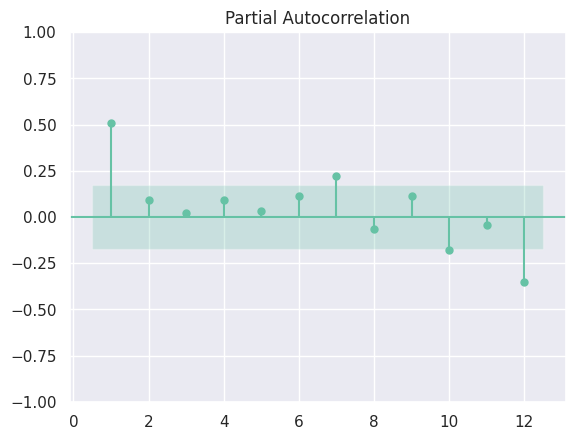

In [32]:
plot_acf(trainset['Rail PM'].diff(12).dropna(),lags=range(1,13))
plt.show()
plot_pacf(trainset['Rail PM'].diff(12).dropna(),lags=range(1,13))
plt.show()

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarimax_model = SARIMAX(trainset["Rail PM"], order=(4,1,4),seasonal_order=(1,1,3,12))
sarimax_res = sarimax_model.fit()

In [34]:
print(sarimax_res.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                    Rail PM   No. Observations:                  137
Model:             SARIMAX(4, 1, 4)x(1, 1, [1, 2, 3], 12)   Log Likelihood               -2300.390
Date:                                    Wed, 05 Nov 2025   AIC                           4626.781
Time:                                            14:13:06   BIC                           4663.444
Sample:                                        01-01-1990   HQIC                          4641.674
                                             - 05-01-2001                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3750      0.331      1.132      0

Text(0.5, 1.0, 'SARIMA(4,1,4)(1,1,3,12)')

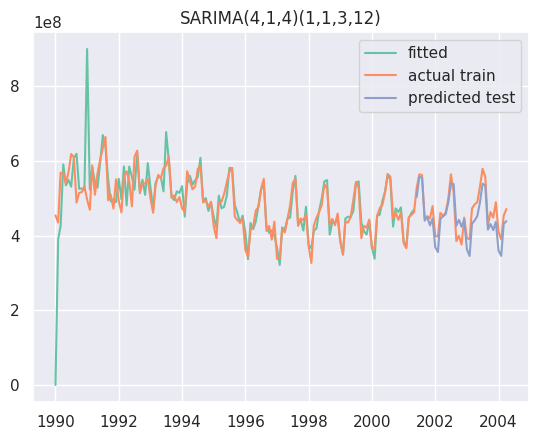

In [35]:
plt.plot(sarimax_res.predict(), label='fitted')
plt.plot(df["Rail PM"],label='actual train')
plt.plot(sarimax_res.predict(start=len(trainset), end=(len(df)-1)), label='predicted test')
plt.legend()
plt.title("SARIMA(4,1,4)(1,1,3,12)")

In [37]:
y_pred_sarima = sarimax_res.predict(start=len(trainset), end=(len(df)-1))

In [38]:
y_pred_sarima

,predicted_mean
2001-06-01,5.034706e+08
2001-07-01,5.571267e+08
2001-08-01,5.553564e+08
2001-09-01,4.401946e+08
2001-10-01,4.493903e+08
2001-11-01,4.273434e+08
2001-12-01,4.454387e+08
2002-01-01,3.689537e+08
2002-02-01,3.560213e+08
2002-03-01,4.444949e+08


In [39]:
print("MAE:", mae(testset["Rail PM"], y_pred_arima_2))
print("MAPE: {:.2f}%".format(mape(testset["Rail PM"], y_pred_sarima) * 100))

MAE: 43114756.05241702
MAPE: 6.15%


Text(0.5, 1.0, 'SARIMA(4,1,4)(1,1,3,12)')

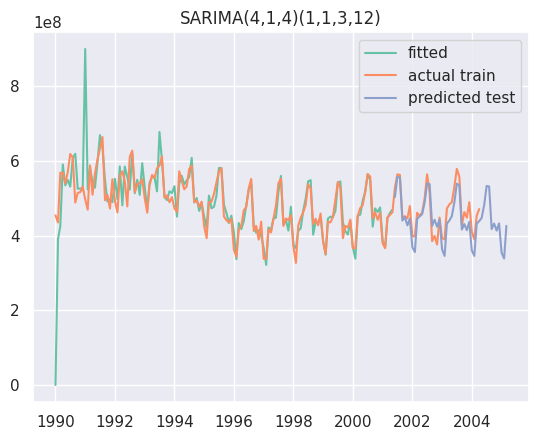

In [40]:
plt.plot(sarimax_res.predict(), label='fitted')
plt.plot(df["Rail PM"],label='actual train')
plt.plot(sarimax_res.predict(start=len(trainset),
                             end=(len(df)+10)), label='predicted test')
plt.legend()
plt.title("SARIMA(4,1,4)(1,1,3,12)")

The **SARIMA(4,1,4)(1,1,3,12)** model fits the data well, capturing both trend and seasonality, as shown by the close alignment between the fitted and actual values.

**ARIMAX**

In [41]:
trainset.head()

,Air RPM (000s),Rail PM,VMT (billions)
Month,,,
1990-01-01,35153577,454115779,163.28
1990-02-01,32965187,435086002,153.25
1990-03-01,39993913,568289732,178.42
1990-04-01,37981886,568101697,178.68
1990-05-01,38419672,539628385,188.88


In [42]:
from statsmodels.tsa.arima.model import ARIMA
# Define the model
arimax_model = ARIMA(endog= trainset["Rail PM"],
                     exog=trainset["Air RPM (000s)"],
                     order=(4,1,4))

# Fit the model
arimax_res = arimax_model.fit()

In [43]:
print(arimax_res.summary())

                               SARIMAX Results                                
Dep. Variable:                Rail PM   No. Observations:                  137
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -2522.670
Date:                Wed, 05 Nov 2025   AIC                           5065.340
Time:                        14:18:49   BIC                           5094.466
Sample:                    01-01-1990   HQIC                          5077.176
                         - 05-01-2001                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Air RPM (000s)     9.7644      0.435     22.456      0.000       8.912      10.617
ar.L1              0.8817     23.899      0.037      0.971     -45.960      47.723
ar.L2             -1.1732     11.904

In [44]:
testset.head()

,Air RPM (000s),Rail PM,VMT (billions)
Month,,,
2001-06-01,64987625,528690495,242.58
2001-07-01,68573410,564037290,248.79
2001-08-01,69003617,562266005,251.69
2001-09-01,39106905,446266947,224.57
2001-10-01,44271037,452095235,240.00


In [45]:
y_pred_arimax = arimax_res.get_forecast(
    steps=len(testset),
    exog=testset[["Air RPM (000s)"]]
)
y_forecast = y_pred_arimax.predicted_mean

In [46]:
mae = mae(testset["Rail PM"], y_forecast)
mape = mape(testset["Rail PM"], y_forecast) * 100

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 57457006.80
MAPE: 12.48%


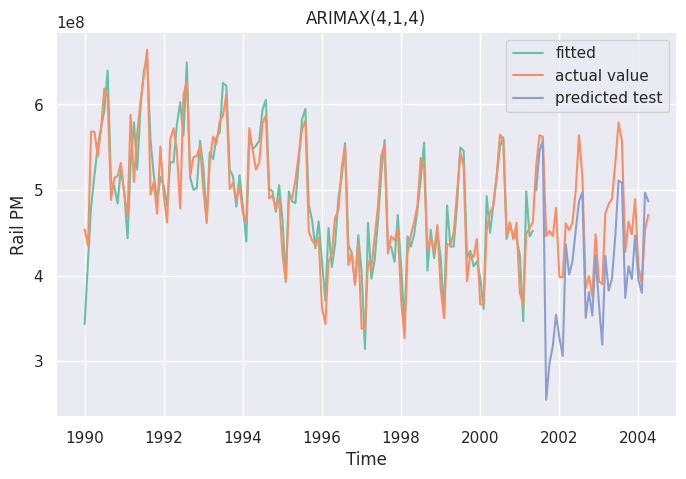

In [48]:
plt.figure(figsize=(8,5))

# Fitted values (train)
plt.plot(arimax_res.fittedvalues, label='fitted')

# Actual full series
plt.plot(df["Rail PM"], label='actual value')

# Predicted (test)
plt.plot(arimax_res.predict(
        start=len(trainset),
        end=len(df)-1,
        exog=testset[["Air RPM (000s)"]]
    ),
    label='predicted test')

plt.legend()
plt.title("ARIMAX(4,1,4)")
plt.xlabel("Time")
plt.ylabel("Rail PM")
plt.show()

**SARIMAX**

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Define the model
sarimax_model  = SARIMAX(endog= trainset["Rail PM"],
                         exog=trainset["Air RPM (000s)"],
                         order=(4,1,4), seasonal_order=(1,1,3,12))

# Fit the model
sarimax_res = sarimax_model.fit()

In [50]:
sarimax_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                    Rail PM   No. Observations:                  137
Model:             SARIMAX(4, 1, 4)x(1, 1, [1, 2, 3], 12)   Log Likelihood               -2292.906
Date:                                    Wed, 05 Nov 2025   AIC                           4613.812
Time:                                            14:22:04   BIC                           4653.296
Sample:                                        01-01-1990   HQIC                          4629.851
                                             - 05-01-2001                                         
Covariance Type:                                      opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Air RPM (000s)    11.7153      0.791     14.806      0.000      10.164      13.266
ar.L1              0.7525      0.752      1.000      0.317      -0.722       2.227
ar.L2              0.2431      1.333      0.182      0.855      -2.370       2.856
ar.L3             -1.1267      1.192     -0.945      0.344      -3.463       1.209
ar.L4              0.3521      0.449      0.785      0.433      -0.527       1.231
ma.L1             -1.0347      0.800     -1.294      0.196      -2.602       0.533
ma.L2             -0.1441      1.614     -0.089      0.929      -3.307       3.019
ma.L3              1.2423      1.508      0.824      0.410      -1.714       4.199
ma.L4             -0.6242      0.587     -1.064      0.287      -1.774       0.526
ar.S.L12          -0.9553      0.202     -4.735      0.000      -1.351      -0.560
ma.S.L12           0.2716      0.327      0.831      0.406      -0.369       0.913
ma.S.L24          -0.5157      0.254     -2.030      0.042      -1.013      -0.018
ma.S.L36          -0.0248      0.183     -0.136      0.892      -0.384       0.334
sigma2          7.077e+14   4.94e-15   1.43e+29      0.000    7.08e+14    7.08e+14
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                88.19
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                            -1.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.08e+45. Standard errors may be unstable.
"""

In [51]:
y_pred_sarimax = sarimax_res.get_forecast(
    steps=len(testset),
    exog=testset[["Air RPM (000s)"]]
)
y_forecast_sarimax = y_pred_sarimax.predicted_mean

In [52]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [53]:
mae_sarimax = mean_absolute_error(testset["Rail PM"],
                                  y_forecast_sarimax)
mape_sarimax = mean_absolute_percentage_error(testset["Rail PM"],
                                              y_forecast_sarimax) * 100

print(f"MAE: {mae_sarimax:.2f}")
print(f"MAPE: {mape_sarimax:.2f}%")

MAE: 104560197.05
MAPE: 23.01%


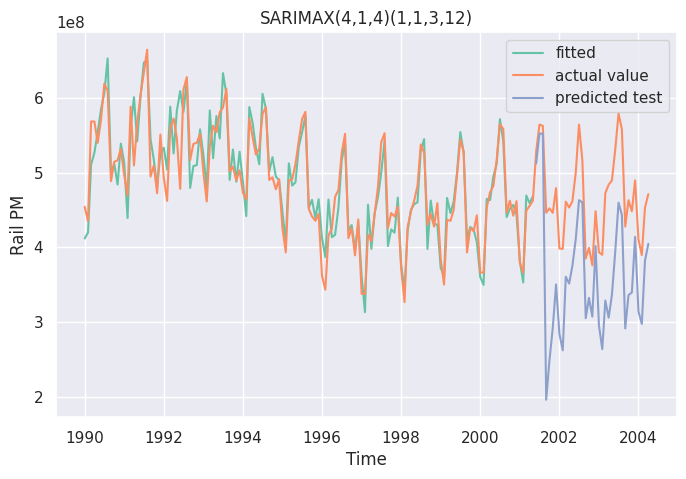

In [55]:
plt.figure(figsize=(8,5))

# Fitted values (train)
plt.plot(sarimax_res.fittedvalues, label='fitted')

# Actual full series
plt.plot(df["Rail PM"], label='actual value')

# Predicted (test)
plt.plot(sarimax_res.predict(
        start=len(trainset),
        end=len(df)-1,
        exog=testset[["Air RPM (000s)"]]
    ),
    label='predicted test')

plt.legend()
plt.title("SARIMAX(4,1,4)(1,1,3,12)")
plt.xlabel("Time")
plt.ylabel("Rail PM")
plt.show()

# **Citing this Notebook**
If you use this notebook in your work, please cite it as follows:

Linh, H. (2025). Machine Learning for Business. Lecture examples and exercises. (Version 1.0.0). URL: https://github.com/MsLinhEIU/MIS-451---Machine-Learning-for-Business-Analytics/tree/main